In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:\\Users\\aashi\\Downloads\\diabetes_data_upload.csv')

In [4]:
#no. of elements
df.shape

(520, 17)

In [5]:
df.size

8840

In [7]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [8]:
bmi = pd.read_csv('C:\\Users\\aashi\\Downloads\\BMI.csv')

In [10]:
bmi.shape

(520, 1)

In [11]:
bmi.size

520

In [12]:
bmi.head()

,BMI
0,25
1,35
2,19
3,21
4,31


In [13]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [17]:
#to merge a column from one dataset into another dataset
df = df.join(bmi)
#or df['BMI'] = bmi

In [18]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,BMI
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,25
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,35
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,19
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,21
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,31


In [19]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
BMI                   0
dtype: int64

In [20]:
#adding a new column with two sub categories
df['age_cat'] = pd.cut(
                       df['Age'],
                       bins = 2,
                       labels= ["Aged", "Youngsters"]
                      )

In [21]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,BMI,age_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,25,Aged
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,35,Youngsters
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,19,Aged
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,21,Aged
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,31,Youngsters


<AxesSubplot:xlabel='age_cat', ylabel='count'>

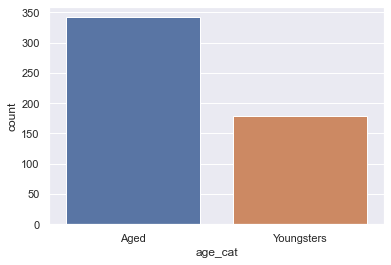

In [24]:
sns.countplot (x= 'age_cat', data=df)

In [32]:
#Drop column
df.drop (['Age'], axis=1, inplace=True)

In [47]:
num_atr = ['BMI']
cat_atr = ['Gender', 'Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness', 'Alopecia','Obesity','class','age_cat']

In [51]:
df[cat_atr]

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_cat
0,1,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,Aged
1,1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,Youngsters
2,1,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,Aged
3,1,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,Aged
4,1,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,Youngsters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,Aged
516,0,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive,Aged
517,0,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,Youngsters
518,0,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,Aged


In [52]:
#perform standardization on categorical columns
le = LabelEncoder()
df[cat_atr] = df[cat_atr].apply(le.fit_transform)

In [53]:
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,BMI,age_cat
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,9,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,19,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,3,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,5,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,15,1


In [62]:
x = num_atr
ss = StandardScaler()
df['BMI'] = ss.fit_transform (df[['BMI']])

In [63]:
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,BMI,age_cat
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,-0.604014,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.593421,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,-1.322475,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,-1.082988,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0.114447,1


In [69]:
from sklearn.preprocessing import StandardScaler
x = num_atr
ss = StandardScaler()
df['BMI'] = ss.fit_transform(df[['BMI']])

In [75]:
from sklearn.model_selection import train_test_split

X= df.drop(['class'], axis=1)
y= df['class']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=1)

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [77]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred = dt.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9615384615384616

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9691629955947135